In [1]:
#C:/Users/shinj/Downloads/default of credit card clients.xls
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

In [7]:
#!pip install xlrd

In [14]:
card_df = pd.read_excel(
     'C:/Users/shinj/Downloads/default of credit card clients.xls'
    ,sheet_name='Data'
    ,header = 1
)

In [15]:
card_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [16]:
card_df.shape

(30000, 25)

In [19]:
card_df.isnull()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [22]:
card_df.rename(
        columns={
            'PAY_0' : 'PAY_1'
            ,'default payment next month' : 'default'
        }
        ,inplace = True
)
card_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

In [24]:
y_target = card_df['default']
X_feature = card_df.drop('default', axis=1)

In [26]:
X_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_1      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In [28]:
X_feature.drop('ID', axis = 1, inplace=True)

In [29]:
X_feature.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

corr = X_feature.corr()

In [31]:
corr

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
LIMIT_BAL,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,...,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595
SEX,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,...,-0.024563,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766
EDUCATION,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,0.097520,...,0.013002,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200
MARRIAGE,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,...,-0.024909,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641
AGE,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,...,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478
PAY_1,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,...,0.179785,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673
PAY_2,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,...,0.224146,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500
PAY_3,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,...,0.227494,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861
PAY_4,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,...,0.244983,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565
PAY_5,-0.249411,-0.055064,0.097520,0.035629,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,...,0.243335,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027


<AxesSubplot:>

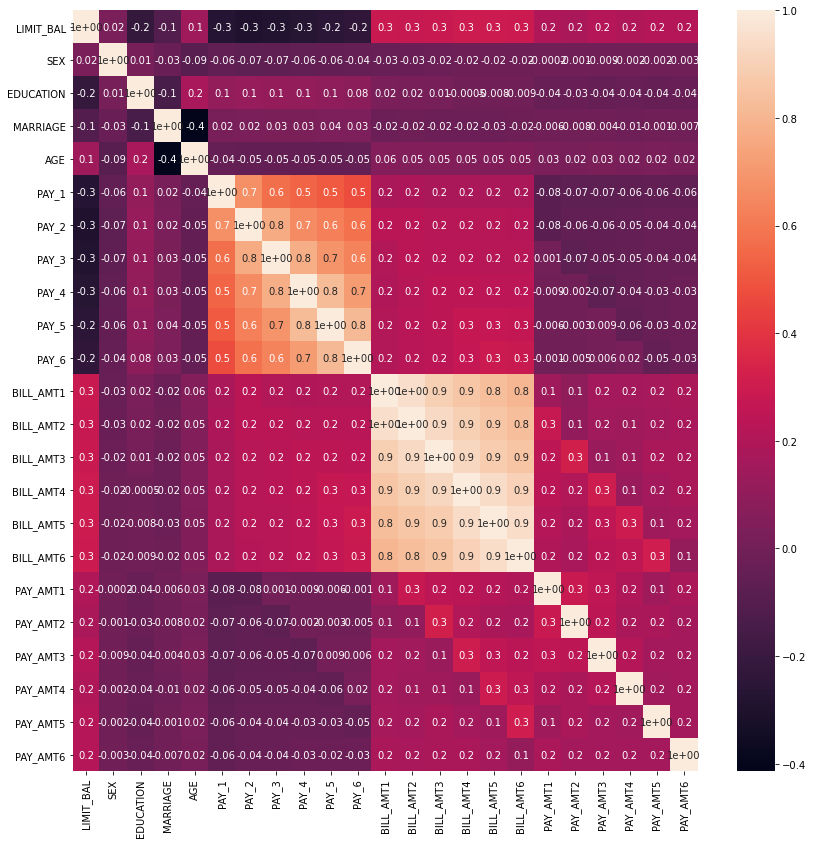

In [34]:
plt.figure(figsize = (14,14))
sns.heatmap(
    corr
    ,annot = True
    ,fmt = '.1'
)

In [36]:
col_bill = ['BILL_AMT' + str(i) for i in range(1,7)]
col_bill

['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

##### PCA 6->2

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [38]:
scaler = StandardScaler()

In [39]:
carf_df_scaled = scaler.fit_transform(X_feature[col_bill])

In [40]:
carf_df_scaled

array([[-0.64250107, -0.64739923, -0.66799331, -0.67249727, -0.66305853,
        -0.65272422],
       [-0.65921875, -0.66674657, -0.63925429, -0.62163594, -0.60622927,
        -0.59796638],
       [-0.29855966, -0.49389911, -0.48240819, -0.44973025, -0.41718767,
        -0.39162956],
       ...,
       [-0.64722711, -0.64383044, -0.63815838, -0.34796096, -0.32451732,
        -0.32768664],
       [-0.71798186,  0.41026929,  0.42237335,  0.14784373, -0.46806261,
         0.16913036],
       [-0.04473888, -0.00385085,  0.03966713, -0.10458204, -0.12966943,
        -0.39559241]])

In [47]:
pca = PCA(n_components=2)
pca.fit(carf_df_scaled)

In [43]:
print(pca.explained_variance_ratio_)

[0.90555253 0.0509867 ]


In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import time

In [49]:
rf_clf = RandomForestClassifier(
     n_estimators=300
    ,random_state=156
)
start_time = time.time()
score = cross_val_score(
     rf_clf
    ,X_feature
    ,y_target
    ,scoring= 'accuracy'
    ,cv = 3
)
end_time = time.time()
print('정확도 : ', score)
print('평균 정확도 : ', np.mean(score))
print('실행 시간: ', (end_time-start_time))

정확도 :  [0.8083 0.8196 0.8232]
평균 정확도 :  0.8170333333333333
실행 시간:  34.744516134262085


In [51]:
carf_df_scaled = scaler.fit_transform(X_feature)

pca = PCA(n_components=6)

carf_df_pca = pca.fit_transform(carf_df_scaled)

start_time = time.time()

carf_df_scaled_pca_score = cross_val_score(
     rf_clf
    ,carf_df_pca
    ,y_target
    ,scoring= 'accuracy'
    ,cv = 3
)
end_time = time.time()
print('정확도 : ', carf_df_scaled_pca_score)
print('평균 정확도 : ', np.mean(carf_df_scaled_pca_score))
print('실행 시간: ', (end_time-start_time))

정확도 :  [0.7898 0.7972 0.8023]
평균 정확도 :  0.7964333333333333
실행 시간:  33.112513303756714
